Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio
!pip3 install matplotlib
!pip3 install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from ultralytics import YOLO
from pathlib import Path
import os
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} ({'GPU' if device != 'cpu' else 'CPU'})")


Using device: cuda:0 (GPU)


In [4]:

CONFIG = {
    'model': 'yolo11m.pt',  # Choose model size: n, s, m, l, x
    'data': 'datasets/Hardhat-or-Hat.v2-with-hat.yolov11/data.yaml',  
    'epochs': 35,
    'batch': 2 if device != 'cpu' else 4,  # Adjust batch 
    'imgsz': 640,
    'patience': 5,
    'device': device, 
}
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [5]:

save_dir = Path('runs/detect')
save_dir.mkdir(parents=True, exist_ok=True)

this_path = os.getcwd()

os.environ['ULTRALYTICS_CONFIG_DIR'] = this_path

data_file = f'{this_path}/{CONFIG['data']}'
with open(data_file, 'r') as f:
    data = yaml.safe_load(f)
    

data['train'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/train/images'
data['val'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/valid/images'
data['test'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/test/images'

with open(data_file, 'w') as f:
    yaml.safe_dump(data, f)


In [6]:

model = YOLO(CONFIG['model'])

In [7]:

results = model.train(
    data=CONFIG['data'],
    epochs=CONFIG['epochs'],
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    patience=CONFIG['patience'],
    device=CONFIG['device'],
    
    verbose=True,
    
    optimizer='SGD',
    lr0=0.001,
    lrf=0.01,
    momentum=0.9,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.01,
    warmup_momentum=0.8,
    amp=False,
    
    # Augmentations
    augment=True,
    hsv_h=0.015,  # Image HSV-Hue augmentationc
    hsv_s=0.7,   # Image HSV-Saturation augmentation
    hsv_v=0.4,   # Image HSV-Value augmentation
    degrees=10,  # Image rotation (+/- deg)
    translate=0.1,  # Image translation (+/- fraction)
    scale=0.3,   # Image scale (+/- gain)
    shear=0.0,   # Image shear (+/- deg)
    perspective=0.0,  # Image perspective
    flipud=0.1,  # Image flip up-down
    fliplr=0.1,  # Image flip left-right
    mosaic=1.0,  # Image mosaic
    mixup=0.0,   # Image mixup
    
)


New https://pypi.org/project/ultralytics/8.3.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=datasets/Hardhat-or-Hat.v2-with-hat.yolov11/data.yaml, epochs=35, time=None, patience=5, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=Fals

train: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v2-with-hat.yolov11/train/labels... 6970 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6970/6970 [00:06<00:00, 1087.51it/s]


train: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v2-with-hat.yolov11/train/labels.cache


val: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v2-with-hat.yolov11/valid/labels... 1992 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1992/1992 [00:02<00:00, 920.97it/s] 


val: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v2-with-hat.yolov11/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.48G      1.745      2.066      1.505         50        640: 100%|██████████| 3485/3485 [34:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:54<00:00,  4.36it/s]


                   all       1992      15306      0.576      0.604      0.606      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35       2.5G       1.53      1.206      1.279         22        640: 100%|██████████| 3485/3485 [34:20<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:53<00:00,  4.37it/s]


                   all       1992      15306      0.716      0.707      0.732      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.49G      1.486      1.013      1.222        131        640: 100%|██████████| 3485/3485 [33:49<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.50it/s]


                   all       1992      15306      0.818      0.742      0.804      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.32G      1.442     0.9407      1.196          5        640: 100%|██████████| 3485/3485 [33:25<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:51<00:00,  4.49it/s]


                   all       1992      15306      0.838      0.784      0.832      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.48G      1.413     0.8816      1.175          5        640: 100%|██████████| 3485/3485 [33:24<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.49it/s]


                   all       1992      15306       0.86      0.794      0.857      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.32G      1.395     0.8287      1.154         10        640: 100%|██████████| 3485/3485 [33:21<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.49it/s]


                   all       1992      15306      0.866      0.824      0.879      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.49G      1.372     0.8129       1.15         11        640: 100%|██████████| 3485/3485 [33:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.52it/s]


                   all       1992      15306       0.88      0.812      0.879      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.34G      1.365     0.7965      1.144         10        640: 100%|██████████| 3485/3485 [33:12<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.53it/s]


                   all       1992      15306      0.896      0.823      0.886      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.32G      1.351     0.7819      1.134          5        640: 100%|██████████| 3485/3485 [33:04<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15306      0.903      0.833      0.886      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.32G      1.335     0.7523       1.13         11        640: 100%|██████████| 3485/3485 [33:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15306      0.884      0.828       0.88      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.48G      1.332      0.746      1.124          3        640: 100%|██████████| 3485/3485 [33:04<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15306      0.843       0.83      0.877      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.32G      1.322     0.7253       1.12          6        640: 100%|██████████| 3485/3485 [33:04<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15306      0.878      0.841      0.888      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.48G      1.308     0.7169      1.114          8        640: 100%|██████████| 3485/3485 [33:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.876       0.84      0.881      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.48G        1.3      0.706      1.108         14        640: 100%|██████████| 3485/3485 [33:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.885      0.839      0.894       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.32G      1.306     0.6941      1.106         37        640: 100%|██████████| 3485/3485 [32:59<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15306      0.877      0.857        0.9      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.34G      1.292     0.6864      1.097         12        640: 100%|██████████| 3485/3485 [33:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15306      0.888      0.847      0.896      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.32G      1.291      0.684      1.096         22        640: 100%|██████████| 3485/3485 [32:57<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.901      0.859      0.913       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.48G      1.277      0.672      1.087         22        640: 100%|██████████| 3485/3485 [33:00<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.885      0.868       0.91      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.48G       1.28     0.6646      1.088         16        640: 100%|██████████| 3485/3485 [33:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15306      0.899      0.857      0.911      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.48G      1.261     0.6535      1.087        118        640: 100%|██████████| 3485/3485 [32:56<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.57it/s]


                   all       1992      15306      0.907      0.861      0.912      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.34G      1.262     0.6514      1.087         92        640: 100%|██████████| 3485/3485 [32:55<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.882       0.86      0.904      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.48G      1.253     0.6475      1.084         69        640: 100%|██████████| 3485/3485 [32:56<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.887      0.848      0.903      0.559
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

22 epochs completed in 12.877 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 40.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [03:49<00:00,  2.17it/s]


                   all       1992      15306      0.844      0.847      0.893      0.546
                   hat        244        287      0.869      0.811      0.876      0.578
                helmet       1202       3942      0.916      0.892      0.942       0.61
             no_helmet        741      11077      0.746      0.838      0.861       0.45
Speed: 0.3ms preprocess, 110.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train3


In [8]:

file_path = f"{str(results.save_dir)}"  
results_csv_path = f"{file_path}/results.csv"  

All expected metrics are present.


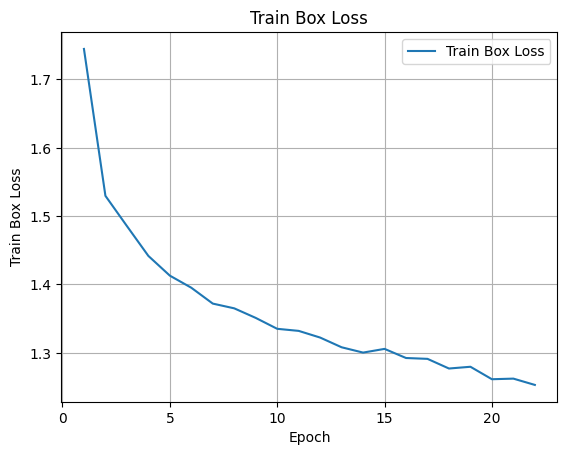

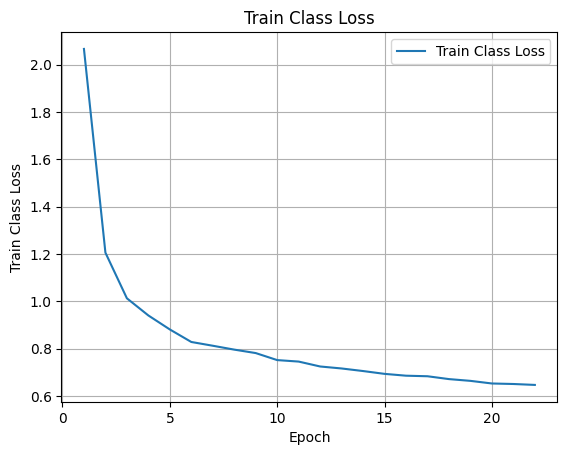

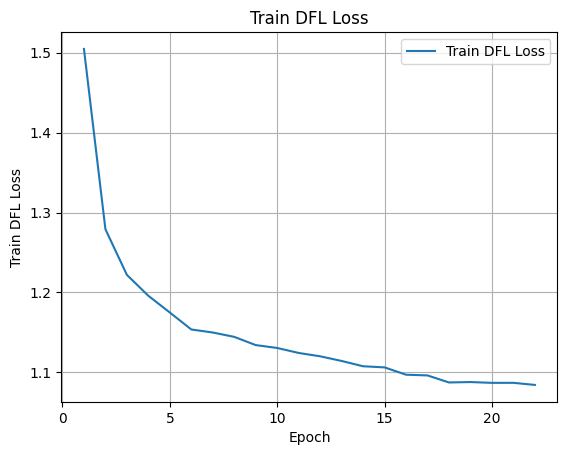

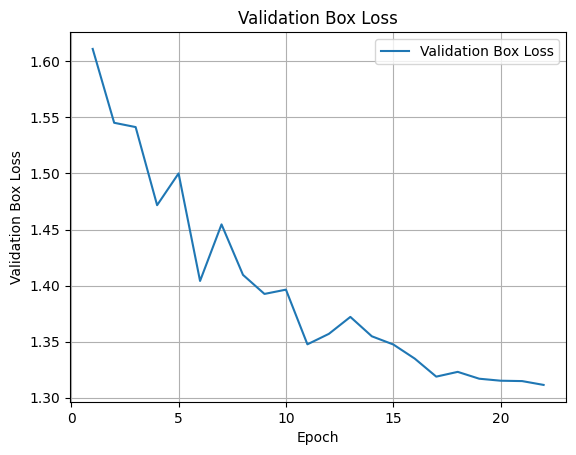

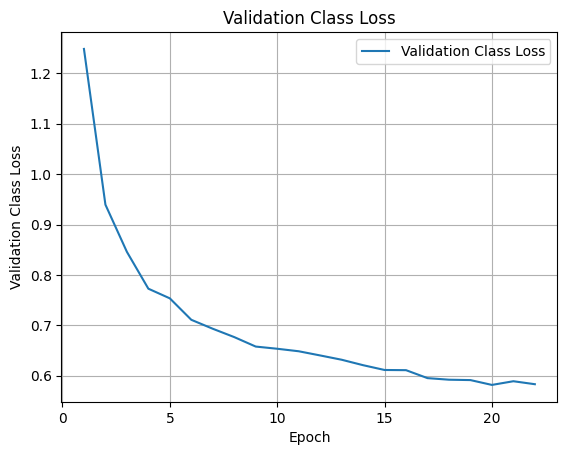

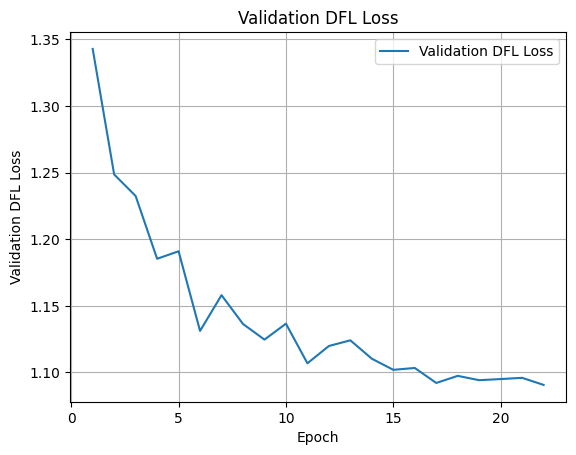

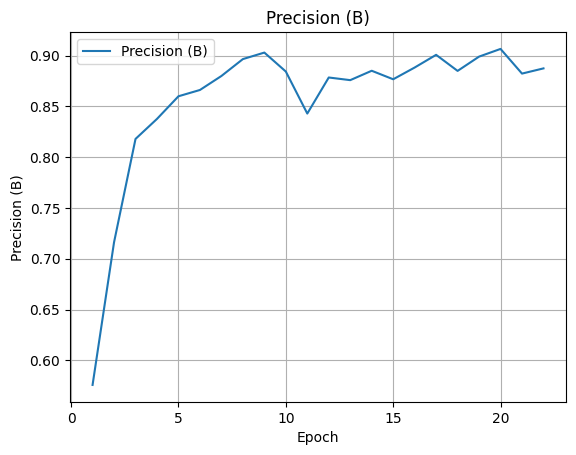

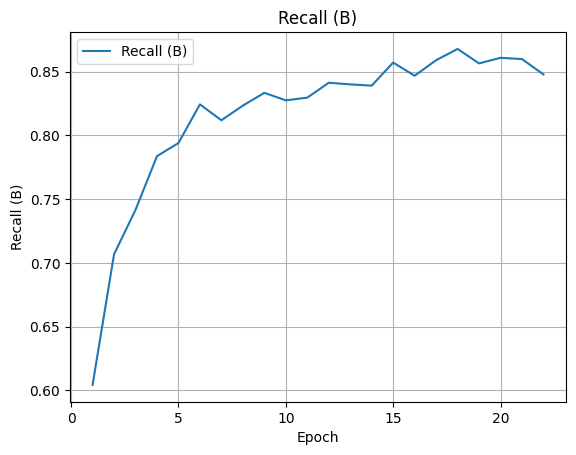

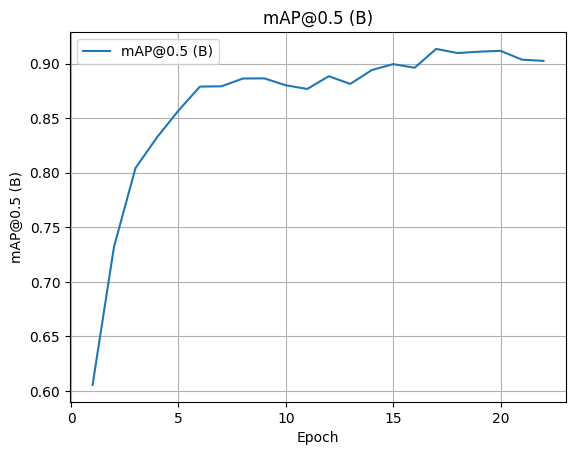

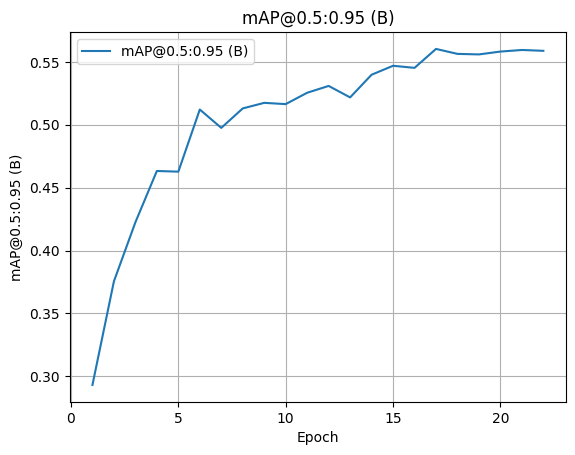


Final Metrics Summary (Last Epoch):
Train Box Loss: 1.2530
Train Class Loss: 0.6475
Train DFL Loss: 1.0842
Validation Box Loss: 1.3114
Validation Class Loss: 0.5830
Validation DFL Loss: 1.0907
Precision (B): 0.8873
Recall (B): 0.8478
mAP@0.5 (B): 0.9025
mAP@0.5:0.95 (B): 0.5588

Improvement Trends:
Train Box Loss: improved (Initial: 1.7447, Final: 1.2530)
Train Class Loss: improved (Initial: 2.0659, Final: 0.6475)
Train DFL Loss: improved (Initial: 1.5048, Final: 1.0842)
Validation Box Loss: improved (Initial: 1.6111, Final: 1.3114)
Validation Class Loss: improved (Initial: 1.2486, Final: 0.5830)
Validation DFL Loss: improved (Initial: 1.3427, Final: 1.0907)
Precision (B): worsened (Initial: 0.5758, Final: 0.8873)
Recall (B): worsened (Initial: 0.6042, Final: 0.8478)
mAP@0.5 (B): worsened (Initial: 0.6055, Final: 0.9025)
mAP@0.5:0.95 (B): worsened (Initial: 0.2932, Final: 0.5588)


In [9]:

try:
    result_metrics = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"File not found: {results_csv_path}")
    exit()


metrics = {
    "Train Box Loss": "train/box_loss",
    "Train Class Loss": "train/cls_loss",
    "Train DFL Loss": "train/dfl_loss",
    "Validation Box Loss": "val/box_loss",
    "Validation Class Loss": "val/cls_loss",
    "Validation DFL Loss": "val/dfl_loss",
    "Precision (B)": "metrics/precision(B)",
    "Recall (B)": "metrics/recall(B)",
    "mAP@0.5 (B)": "metrics/mAP50(B)",
    "mAP@0.5:0.95 (B)": "metrics/mAP50-95(B)",
}

%matplotlib inline

available_metrics = {name: col for name, col in metrics.items() if col in result_metrics.columns}
missing_metrics = [name for name in metrics if name not in available_metrics]

if missing_metrics:
    print(f"Missing metrics: {', '.join(missing_metrics)}")
else:
    print("All expected metrics are present.")

for metric_name, col in available_metrics.items():
    plt.figure()
    plt.plot(result_metrics["epoch"], result_metrics[col], label=metric_name)
    plt.title(metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

final_epoch = result_metrics.iloc[-1]
final_metrics = {name: final_epoch[col] for name, col in available_metrics.items()}

print("\nFinal Metrics Summary (Last Epoch):")
for name, value in final_metrics.items():
    print(f"{name}: {value:.4f}")

print("\nImprovement Trends:")
for metric_name, col in available_metrics.items():
    initial = result_metrics[col].iloc[0]
    final = result_metrics[col].iloc[-1]
    trend = "improved" if final < initial else "worsened"
    print(f"{metric_name}: {trend} (Initial: {initial:.4f}, Final: {final:.4f})")


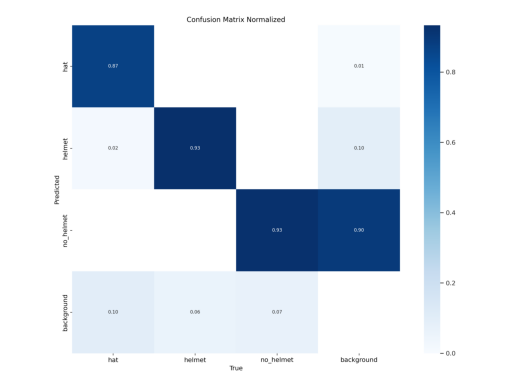

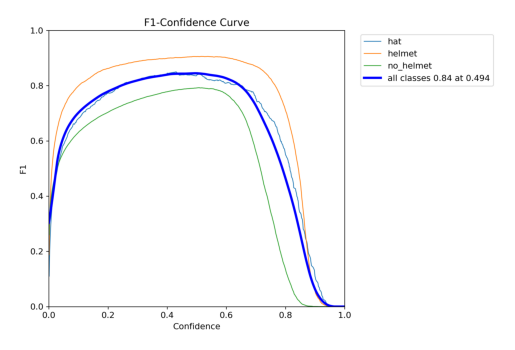

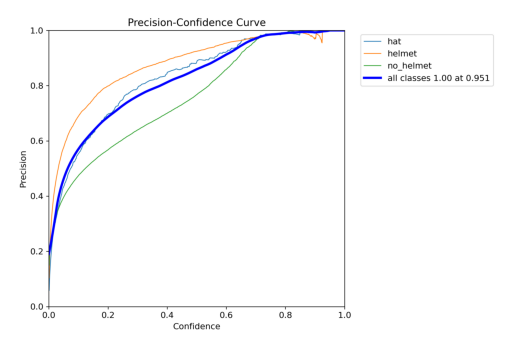

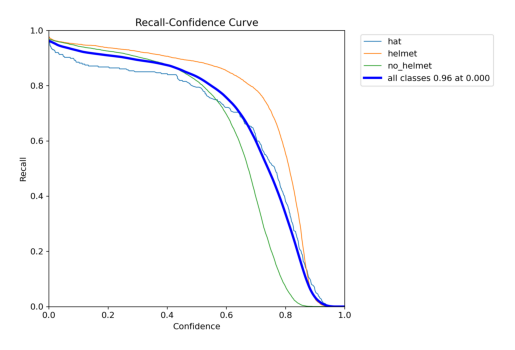

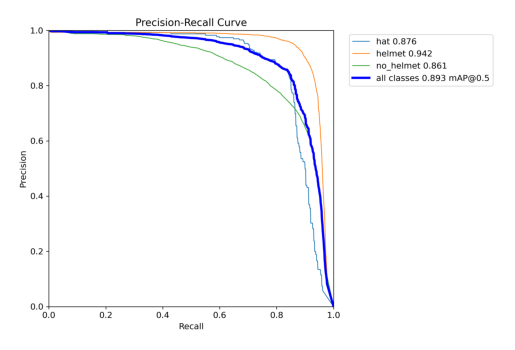

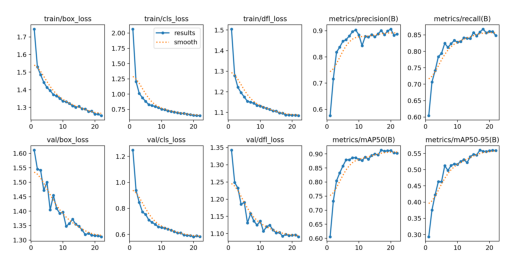

In [10]:


img = mpimg.imread(f"{file_path}/confusion_matrix_normalized.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/F1_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/P_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/R_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/PR_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/results.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

